# Simulating a (photometric) redshift distribution

## Introduction:
The distribution of a galaxy sample in redshift is one of the main ingredients in modeling cosmological observables. For photometric surveys (DES, KiDS, HSC, LSST, Roman, Euclid) this distribution is obtained from the measured flux of galaxies in different photometric bands (see slide below for illustration) 

![image](PZ_concept.png)


Here we are building PZ distributions that approximate those that we will obtain from a joint Roman+LSST dataset. 

## Create true redshift distribution

(0.5948550593701336, 1.1965127041627036e-08) 0.5948399851707072


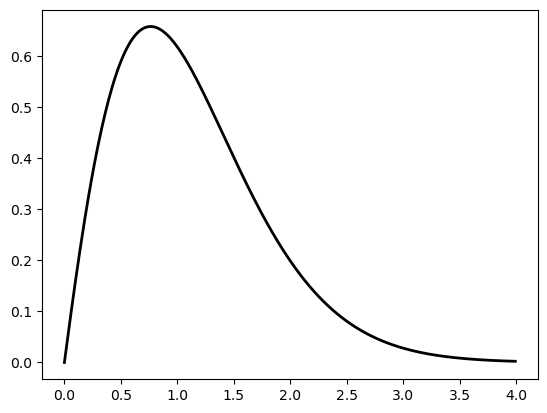

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

ALPHA  = 1.0
BETA_P = 1.5
Z0     = 1.0
ZMIN   = 0.0
ZMAX   = 4.0

def dndz(z,ALPHA,BETA_P,Z0):
    return z**ALPHA*np.exp(-((z/Z0)**BETA_P))

I = quad(dndz, ZMIN, ZMAX, args=(ALPHA,BETA_P,Z0))

                            
dz = 0.01
z = np.arange(ZMIN, ZMAX, dz)
f = np.arange(ZMIN, ZMAX, dz)

for i in range(len(z)):
    f[i]= (z[i]**ALPHA)*np.exp(-((z[i]/Z0)**BETA_P))

norm=np.cumsum(f*dz)  
print(I, norm[len(z)-1])

dndz=f/norm[len(z)-1]
#print(np.cumsum(dndz*dz))
plt.plot(z, dndz, 'black', lw=2)



## Divide redshift distribution into 10 tomographic bins
The bins are chosen such that the number density of galaxies (area below the curve) is the same in each bin

0 [0, 0.37] 0.1
1 [0, 0.37, 0.55] 0.2
2 [0, 0.37, 0.55, 0.7000000000000001] 0.3
3 [0, 0.37, 0.55, 0.7000000000000001, 0.85] 0.4
4 [0, 0.37, 0.55, 0.7000000000000001, 0.85, 1.01] 0.5
5 [0, 0.37, 0.55, 0.7000000000000001, 0.85, 1.01, 1.18] 0.6
6 [0, 0.37, 0.55, 0.7000000000000001, 0.85, 1.01, 1.18, 1.3800000000000001] 0.7
7 [0, 0.37, 0.55, 0.7000000000000001, 0.85, 1.01, 1.18, 1.3800000000000001, 1.6300000000000001] 0.8
8 [0, 0.37, 0.55, 0.7000000000000001, 0.85, 1.01, 1.18, 1.3800000000000001, 1.6300000000000001, 2.0100000000000002] 0.9
9 [0, 0.37, 0.55, 0.7000000000000001, 0.85, 1.01, 1.18, 1.3800000000000001, 1.6300000000000001, 2.0100000000000002, 3.99] 1.0
[0, 37, 55, 70, 85, 101, 118, 138, 163, 201, 399] [0, 0.37, 0.55, 0.7000000000000001, 0.85, 1.01, 1.18, 1.3800000000000001, 1.6300000000000001, 2.0100000000000002, 3.99]


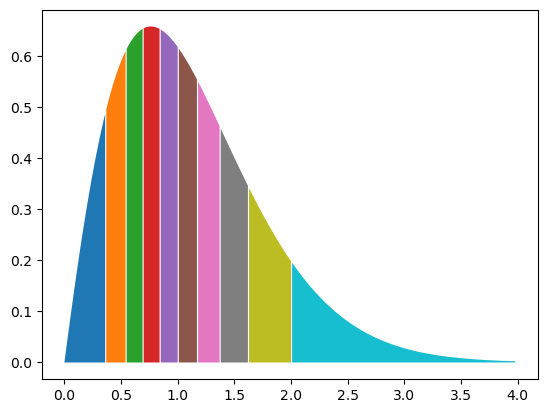

In [186]:
def find_index_exceeding_value(array, value):
  for i, element in enumerate(array):
    if element > value:
      return i
  return -1

tomo_bins=10

tomo_limits= [0]
index=[0]
for i in range(tomo_bins):
    tomo_limits.append(z[find_index_exceeding_value(np.cumsum(dndz*dz), (i+1)/tomo_bins)])
    print(i,tomo_limits,(i+1)/tomo_bins)
    index.append(np.where(np.cumsum(dndz*dz) > (i+1)/tomo_bins)[0][0])
    #print(i, index,tomo_limits)

print(index,tomo_limits)


for i in range(tomo_bins):
    plt.fill_between(z[index[i]:index[i+1]], dndz[index[i]:index[i+1]], y2=0)
plt.show()

## Add Gaussian photo-z uncertainties in each tomographic bin

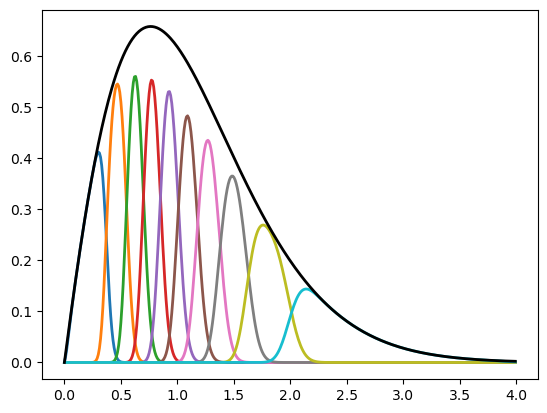

In [197]:
from scipy import special


def sigma_z(z):
    sig_z=0.03*(1.0+z) 
    return sig_z

def delta_z(z):
    del_z=0.0*(1.0+z)
    return del_z

dndzconv=np.zeros((len(z), tomo_bins))
for k in range(tomo_bins):
    for i in range(len(z)):
        x1 = (tomo_limits[k] - z[i] + delta_z(z[i]))/(np.sqrt(2.)*sigma_z(z[i]))
        x2 = (tomo_limits[k+1] - z[i] + delta_z(z[i]))/(np.sqrt(2.)*sigma_z(z[i]))
        dndzconv[i][k]=(0.5*dndz[i]*(special.erf(x2) - special.erf(x1)))
    plt.plot(z, dndzconv[:,k], lw=2)

plt.plot(z, dndz, 'black', lw=2, label=r'Roman Galaxy Sample')
plt.show()

    

